/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


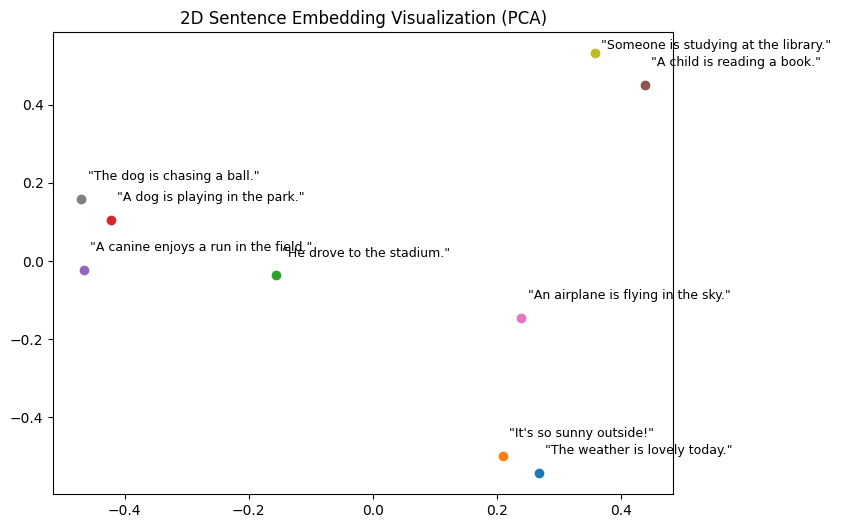

In [1]:
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA


# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")


with open('data/sentences.txt', 'r', encoding='utf-8') as file:
    sentences = file.readlines()

# 2. Calculate embeddings by calling model.encode()
s_embeddings = model.encode(sentences)



# Reduce dimensionality to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(s_embeddings)

# Plot it
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(reduced):
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, sentences[i], fontsize=9)

plt.title("2D Sentence Embedding Visualization (PCA)")
plt.show()

In [3]:
from sentence_transformers import CrossEncoder

model = CrossEncoder("cross-encoder/nli-deberta-v3-base")
scores = model.predict([
    ("A man is eating pizza", "A man eats something"),
    ("A black race car starts up in front of a crowd of people.", "A man is driving down a lonely road."),
])

# Convert scores to labels
label_mapping = ["contradiction", "entailment", "neutral"]
labels = [label_mapping[score_max] for score_max in scores.argmax(axis=1)]
print(labels)

['entailment', 'contradiction']
